In [322]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 999)

In [323]:
data_path = "C:/Users/armcl/Python/Springboard_Cap1/Data/" #Home
#data_path = "C:/Users/yyzhao/python/Springboard/Capstone1/Data/" #Work

In [324]:
#Read cleaned redfin and airbnb data
redfin = pd.read_csv(data_path + "redfin_clean_scc.csv")


In [325]:
#Extra cleaning
redfin = redfin.rename(columns={"PROPERTY TYPE": "PROPERTY_TYPE", "ZIP OR POSTAL CODE": "ZIPCODE",
                      "SQUARE FEET": "SQUARE_FEET", "LOT SIZE": "LOT_SIZE", 
                      "YEAR BUILT": "YEAR", "TOTAL SIZE":"TOTAL_SIZE", 
                      "Percentage Standard Met and Above":"SCHOOL"})

#redfin = redfin.loc[redfin['ZIPCODE'] == 95051, :]

redfin = redfin.drop(columns = ['SOLD DATE', 
                               'QUARTER','Date','DIST_TO_FACEBOOK','DIST_TO_SFO',
                               'DIST_TO_SF','TOTAL_SIZE'])

redfin['zipcode'] = redfin['ZIPCODE']
redfin = pd.get_dummies(redfin, columns=['PROPERTY_TYPE','CITY','ZIPCODE'])

In [326]:
#redfin = redfin[['PRICE', 'BEDS', 'BATHS', 'SQUARE_FEET', 'LOT_SIZE', 
#                           'YEAR', 'HOA/MONTH']]

In [327]:
redfin = redfin.loc[redfin['PRICE'] <= 3000000, :]

#redfin = redfin.loc[redfin['BEDS'] <= 5, :]
redfin.head()

,PRICE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR,HOA/MONTH,LATITUDE,LONGITUDE,Q_1,Q_2,Q_3,Q_4,sale_num_zip,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,zipcode,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_MFH(2-4),PROPERTY_TYPE_SFH,PROPERTY_TYPE_Townhouse,CITY_ALVISO,CITY_CAMPBELL,CITY_CUPERTINO,CITY_GILROY,CITY_LOS ALTOS,CITY_LOS ALTOS HILLS,CITY_LOS GATOS,CITY_MILPITAS,CITY_MONTE SERENO,CITY_MORGAN HILL,CITY_MOUNTAIN VIEW,CITY_PALO ALTO,CITY_SAN JOSE,CITY_SAN MARTIN,CITY_SANTA CLARA,CITY_SARATOGA,CITY_STANFORD,CITY_SUNNYVALE,ZIPCODE_94022,ZIPCODE_94024,ZIPCODE_94040,ZIPCODE_94041,ZIPCODE_94043,ZIPCODE_94085,ZIPCODE_94086,ZIPCODE_94087,ZIPCODE_94089,ZIPCODE_94301,ZIPCODE_94303,ZIPCODE_94304,ZIPCODE_94305,ZIPCODE_94306,ZIPCODE_95002,ZIPCODE_95008,ZIPCODE_95014,ZIPCODE_95020,ZIPCODE_95030,ZIPCODE_95032,ZIPCODE_95033,ZIPCODE_95035,ZIPCODE_95037,ZIPCODE_95046,ZIPCODE_95050,ZIPCODE_95051,ZIPCODE_95054,ZIPCODE_95070,ZIPCODE_95110,ZIPCODE_95111,ZIPCODE_95112,ZIPCODE_95113,ZIPCODE_95116,ZIPCODE_95117,ZIPCODE_95118,ZIPCODE_95119,ZIPCODE_95120,ZIPCODE_95121,ZIPCODE_95122,ZIPCODE_95123,ZIPCODE_95124,ZIPCODE_95125,ZIPCODE_95126,ZIPCODE_95127,ZIPCODE_95128,ZIPCODE_95129,ZIPCODE_95130,ZIPCODE_95131,ZIPCODE_95132,ZIPCODE_95133,ZIPCODE_95134,ZIPCODE_95135,ZIPCODE_95136,ZIPCODE_95138,ZIPCODE_95139,ZIPCODE_95140,ZIPCODE_95148
0,1050000.0,3.0,2.0,1097.0,6242.0,1961.0,117.0,37.389165,-121.947778,0,0,1,0,300,7.831138,6.021112,5.013714,12.520029,7.025839,4.615506,4.327803,9.134459,4.982873,4.813922,4.863905,1.398783,1.877193,51.005,18.6,30.0,24.3,8.141868,95054,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,882000.0,1.0,1.0,865.0,865.0,2005.0,383.0,37.396173,-121.943140,0,1,0,0,300,7.952171,6.533607,5.545432,12.628724,7.270338,4.962220,4.807594,9.642046,5.245473,5.055797,4.998462,1.289921,2.196742,51.005,18.6,30.0,24.3,8.408700,95054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,680000.0,1.0,1.0,900.0,900.0,2005.0,390.0,37.396330,-121.943234,0,0,0,1,300,7.944713,6.537169,5.550320,12.620936,7.265331,4.959864,4.818334,9.652188,5.257395,5.050900,4.991439,1.280373,2.208670,51.005,18.6,30.0,24.3,8.405558,95054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1182375.0,4.0,2.0,1466.0,7618.0,1961.0,117.0,37.387366,-121.950200,0,0,0,1,300,7.741506,5.839159,4.832416,12.431469,6.901026,4.465685,4.211869,8.999119,4.964681,4.692581,4.774428,1.421669,1.854110,51.005,18.6,30.0,24.3,8.018523,95054,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1570000.0,4.0,2.0,1666.0,6000.0,1969.0,117.0,37.392009,-121.940445,0,1,0,0,300,8.165457,6.455431,5.431785,12.849111,7.420835,5.046330,4.525220,9.375913,4.922941,5.205928,5.202981,1.565417,1.876366,51.005,18.6,30.0,24.3,8.507886,95054,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [328]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [330]:
#Standardize the data
#from sklearn import preprocessing

#Log transform
#from sklearn.preprocessing import FunctionTransformer
#transformer = FunctionTransformer(np.log1p)
#redfin[predictors] = transformer.transform(redfin[predictors])

#scaler = preprocessing.StandardScaler()

target_column_redfin = ['PRICE'] 
predictors_redfin = list(redfin.drop(columns=['PRICE','zipcode']).columns)
#redfin[predictors] = scaler.fit_transform(redfin[predictors])
#redfin[target_column] = scaler.fit_transform(redfin[target_column])

redfin.describe()

,PRICE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR,HOA/MONTH,LATITUDE,LONGITUDE,Q_1,Q_2,Q_3,Q_4,sale_num_zip,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,zipcode,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_MFH(2-4),PROPERTY_TYPE_SFH,PROPERTY_TYPE_Townhouse,CITY_ALVISO,CITY_CAMPBELL,CITY_CUPERTINO,CITY_GILROY,CITY_LOS ALTOS,CITY_LOS ALTOS HILLS,CITY_LOS GATOS,CITY_MILPITAS,CITY_MONTE SERENO,CITY_MORGAN HILL,CITY_MOUNTAIN VIEW,CITY_PALO ALTO,CITY_SAN JOSE,CITY_SAN MARTIN,CITY_SANTA CLARA,CITY_SARATOGA,CITY_STANFORD,CITY_SUNNYVALE,ZIPCODE_94022,ZIPCODE_94024,ZIPCODE_94040,ZIPCODE_94041,ZIPCODE_94043,ZIPCODE_94085,ZIPCODE_94086,ZIPCODE_94087,ZIPCODE_94089,ZIPCODE_94301,ZIPCODE_94303,ZIPCODE_94304,ZIPCODE_94305,ZIPCODE_94306,ZIPCODE_95002,ZIPCODE_95008,ZIPCODE_95014,ZIPCODE_95020,ZIPCODE_95030,ZIPCODE_95032,ZIPCODE_95033,ZIPCODE_95035,ZIPCODE_95037,ZIPCODE_95046,ZIPCODE_95050,ZIPCODE_95051,ZIPCODE_95054,ZIPCODE_95070,ZIPCODE_95110,ZIPCODE_95111,ZIPCODE_95112,ZIPCODE_95113,ZIPCODE_95116,ZIPCODE_95117,ZIPCODE_95118,ZIPCODE_95119,ZIPCODE_95120,ZIPCODE_95121,ZIPCODE_95122,ZIPCODE_95123,ZIPCODE_95124,ZIPCODE_95125,ZIPCODE_95126,ZIPCODE_95127,ZIPCODE_95128,ZIPCODE_95129,ZIPCODE_95130,ZIPCODE_95131,ZIPCODE_95132,ZIPCODE_95133,ZIPCODE_95134,ZIPCODE_95135,ZIPCODE_95136,ZIPCODE_95138,ZIPCODE_95139,ZIPCODE_95140,ZIPCODE_95148
count,2.305900e+04,23059.000000,23059.000000,23059.000000,2.305900e+04,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.0,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.00000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.000000,23059.00000,23059.000000,23059.000000,23059.000000,23059.000000
mean,1.245505e+06,3.218787,2.265178,1693.422178,8.724250e+03,1974.457088,196.494341,37.294278,-121.886224,0.184050,0.307169,0.274210,0.234572,676.951776,14.636313,10.234000,9.507121,18.864261,13.281301,11.139688,7.914761,8.919261,7.689480,11.821299,12.336236,10.543895,8.637333,54.375781,23.440865,32.669955,28.055410,14.045571,94962.989635,0.161412,0.001128,0.704887,0.132573,0.000043,0.031961,0.023071,0.047617,0.010538,0.000651,0.029620,0.037903,0.001344,0.048224,0.039160,0.011926,0.564075,0.003599,0.066438,0.016436,0.000867,0.066525,0.004900,0.006288,0.013487,0.005074,0.020599,0.012533,0.019992,0.026931,0.007069,0.003209,0.0,0.000043,0.000867,0.008673,0.000043,0.031918,0.023071,0.047617,0.008153,0.022724,0.000087,0.037903,0.048224,0.003599,0.020599,0.032829,0.01301,0.016436,0.010668,0.022768,0.020643,0.000867,0.016219,0.011622,0.025326,0.008457,0.028189,0.015439,0.016523,0.056551,0.042066,0.046836,0.019255,0.031224,0.021944,0.017260,0.007459,0.015309,0.021337,0.014398,0.004250,

In [331]:
#Creating the Training and Test Datasets
from sklearn.model_selection import train_test_split

X_redfin = redfin[predictors_redfin]
y_redfin = redfin[target_column_redfin]

X_train_redfin, X_test_redfin, y_train_redfin, y_test_redfin = train_test_split(X_redfin, y_redfin, test_size=0.30,random_state=40)

print(X_train_redfin.shape); print(X_test_redfin.shape)

(16141, 110)
(6918, 110)


In [332]:
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
rfr_redfin=RandomForestRegressor(n_estimators=100, random_state = 42) #number of trees in the forest

#Baseline model
#Train the model using the training sets y_pred=rfr_redfin.predict(X_test)
rfr_redfin.fit(X_train_redfin,y_train_redfin)

print("Training Score:",rfr_redfin.score(X_train_redfin, y_train_redfin))

print("Test Score:",rfr_redfin.score(X_test_redfin, y_test_redfin))

y_true_redfin = y_test_redfin.PRICE
y_pred_redfin =rfr_redfin.predict(X_test_redfin)

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:",round(sqrt(mean_squared_error(y_true_redfin, y_pred_redfin)), 2))

from sklearn.metrics import median_absolute_error
print("Median Absolute Error: " + str(round(median_absolute_error(y_true_redfin, y_pred_redfin), 2)))

C:\Users\armcl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training Score: 0.9894917831916862
Test Score: 0.9254846170019926
RMSE: 148144.72
Median Absolute Error: 69692.85


In [333]:
#Parameters used in Random Forest Regressor
from pprint import pprint
pprint(rfr_redfin.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [334]:
feature_imp_redfin = pd.Series(rfr_redfin.feature_importances_,index=predictors_redfin).sort_values(ascending=False)
feature_imp_redfin

SCHOOL                       2.969281e-01
SQUARE_FEET                  2.020412e-01
PROPERTY_TYPE_SFH            1.222267e-01
CITY_SAN JOSE                8.487187e-02
LONGITUDE                    7.996229e-02
DIST_TO_OLD_APPLE            5.477169e-02
HOA/MONTH                    2.475771e-02
LOT_SIZE                     1.920250e-02
YEAR                         1.077137e-02
DIST_TO_SJ_DOWNTOWN          7.352228e-03
sale_num_zip                 6.973582e-03
LATITUDE                     6.909964e-03
DIST_TO_NETFLIX              5.782563e-03
BATHS                        5.599141e-03
DIST_TO_SJC                  5.599013e-03
BEDS                         5.446836e-03
Crime                        5.369330e-03
DIST_TO_WORK                 4.938974e-03
DIST_TO_LEVIS                4.937581e-03
Property_Crime               4.683617e-03
Violent_Crime                4.419188e-03
DIST_TO_NEW_APPLE            4.355279e-03
DIST_TO_PA_STATION           3.704009e-03
DIST_TO_WF_MALL              3.589

No handles with labels found to put in legend.


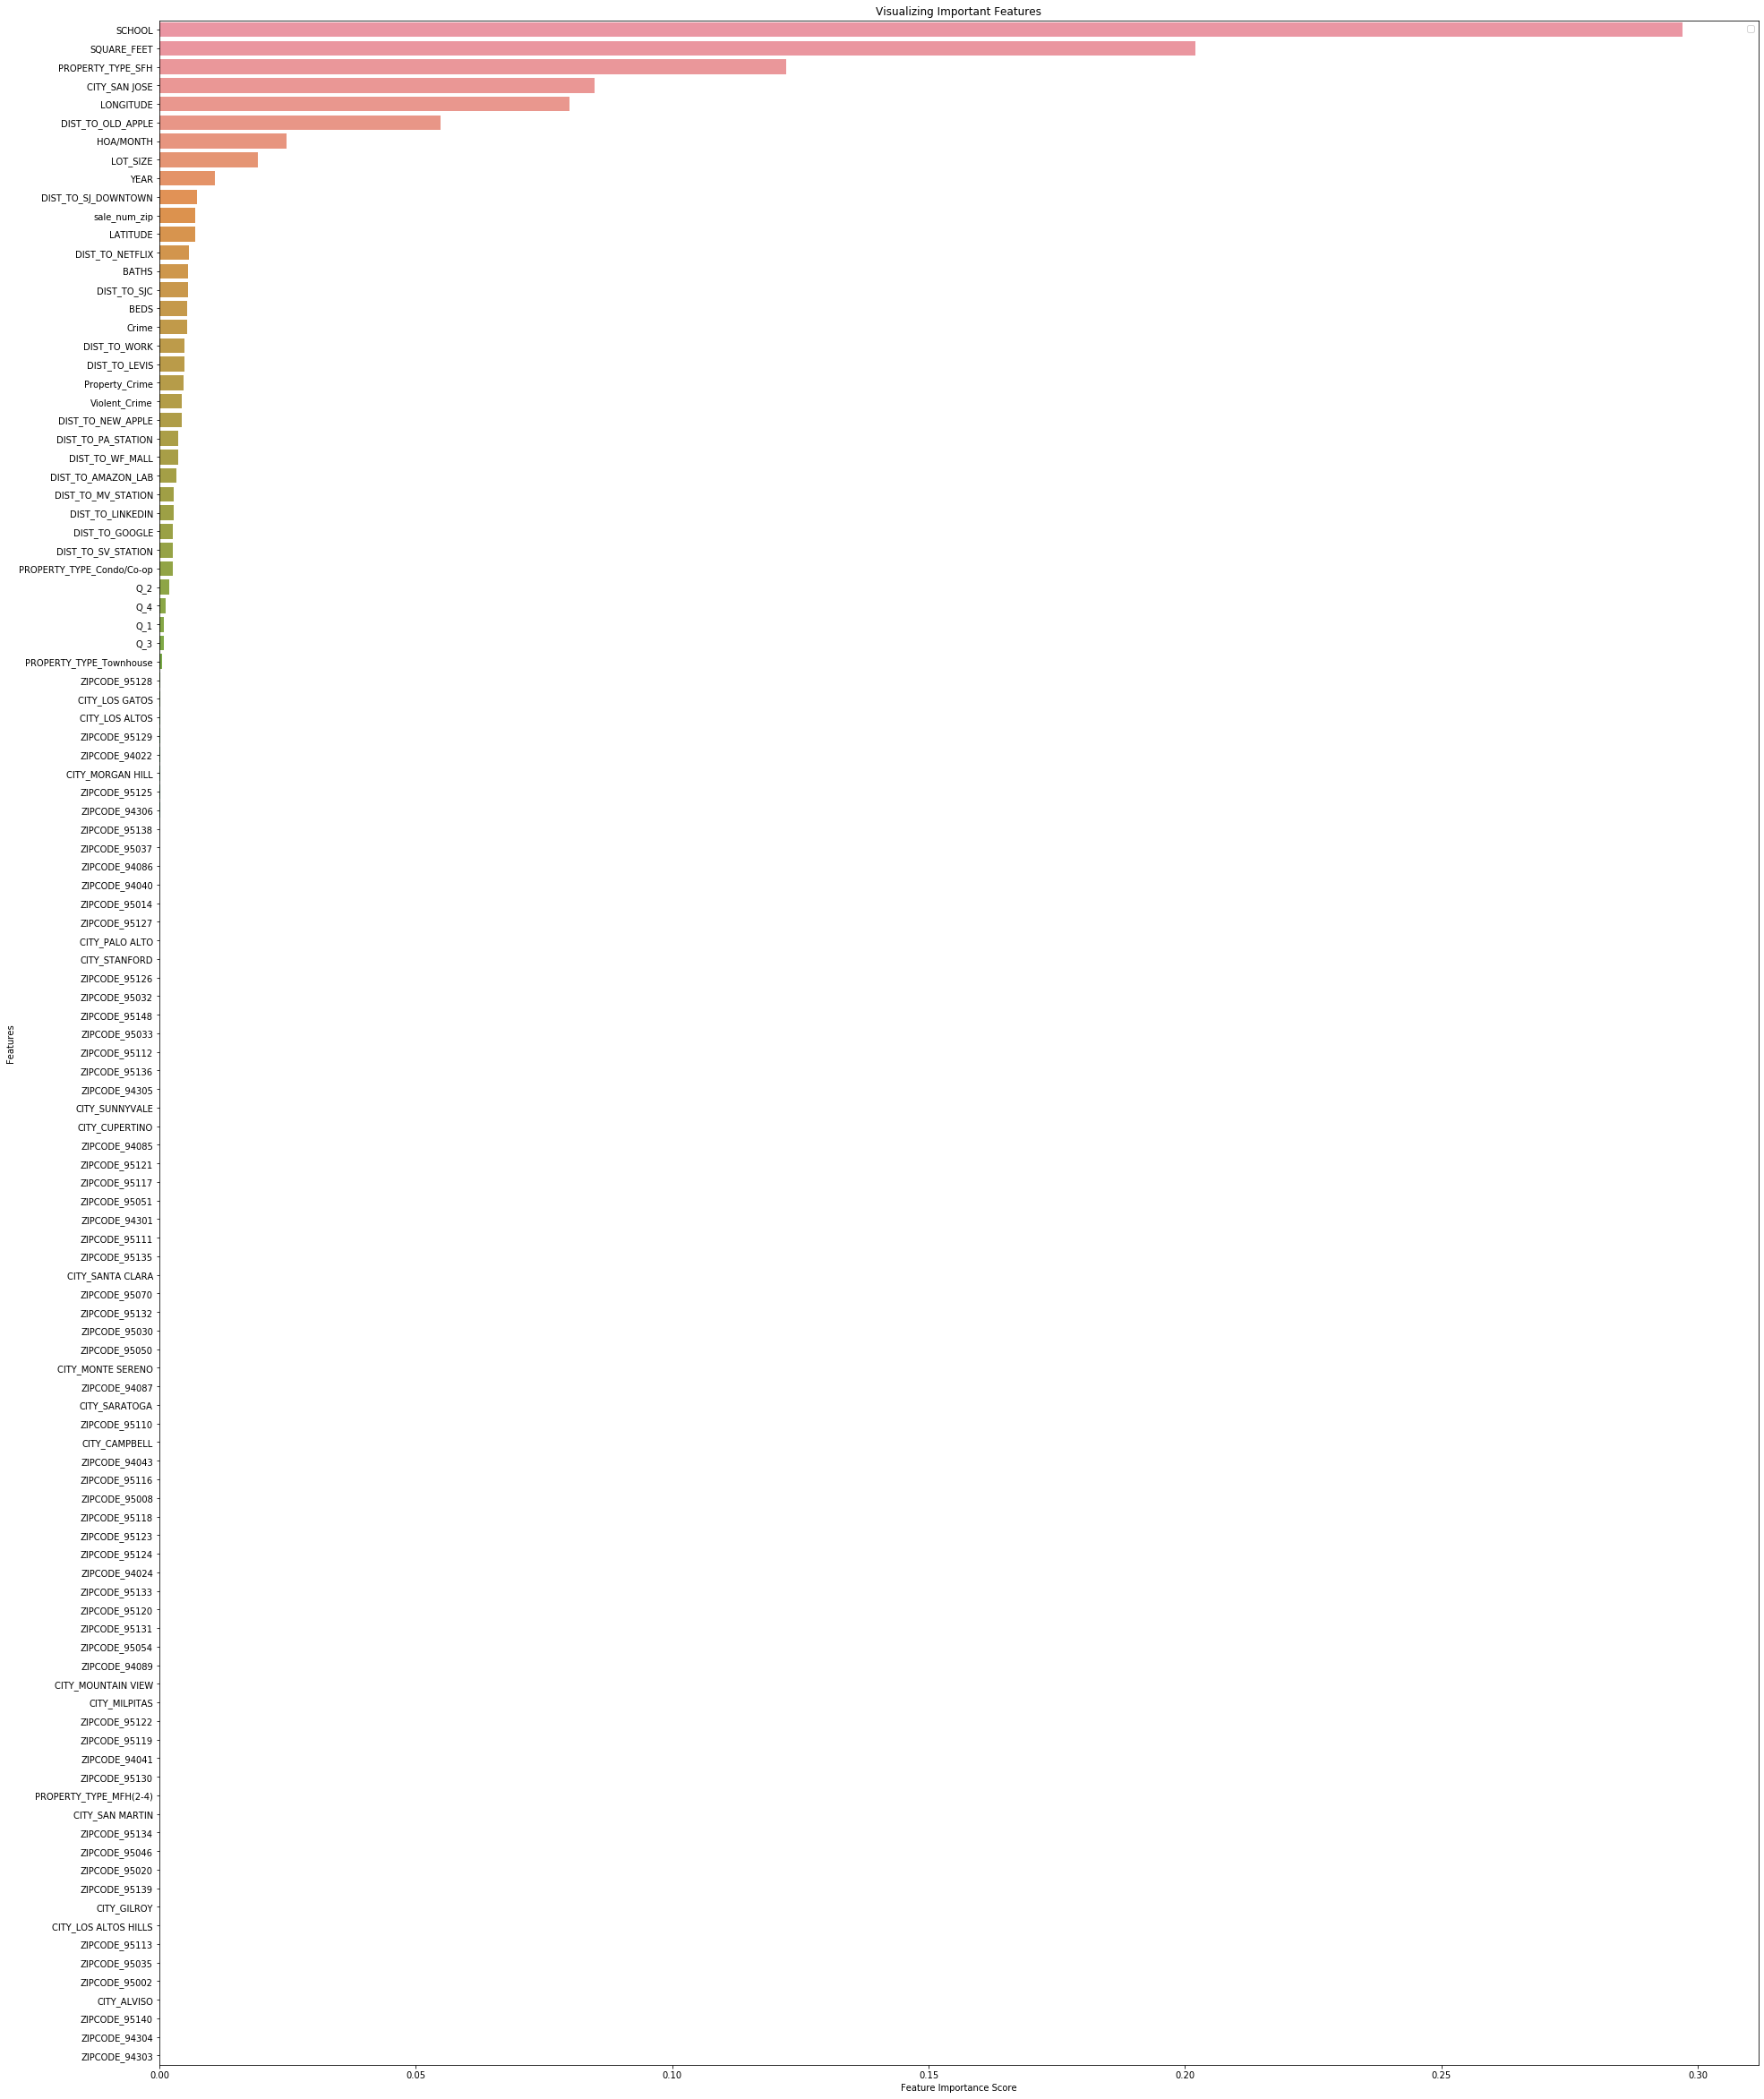

In [335]:
plt.figure(figsize=(32, 42))
sns.barplot(x=feature_imp_redfin, y=feature_imp_redfin.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Relationship between Original and Predicted Price')

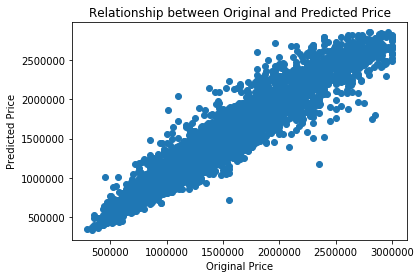

In [336]:
#Fitted vs. Original

#Homes with price > $5mm show big errors
plt.scatter(y_true_redfin, y_pred_redfin)
plt.xlabel("Original Price")
plt.ylabel("Predicted Price")
plt.title("Relationship between Original and Predicted Price")

Text(0.5, 1.0, 'Relationship between Residuals and Fitted Values')

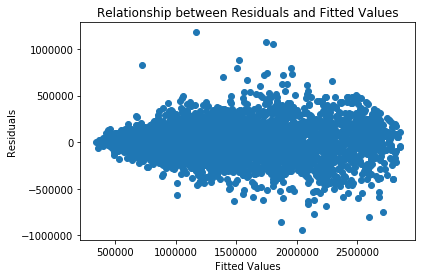

In [337]:
#Residuals vs. Fitted

residuals_redfin = y_test_redfin['PRICE'].to_numpy() - y_pred_redfin

plt.scatter(y_pred_redfin, residuals_redfin)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Relationship between Residuals and Fitted Values")

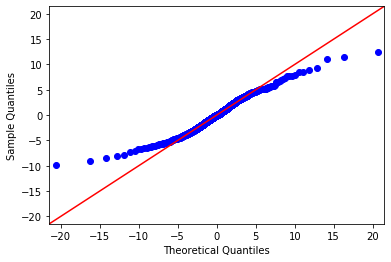

In [338]:
#QQ Plot
import scipy.stats as stats

fig = sm.qqplot(residuals_redfin, stats.t, fit=True, line='45')
plt.show()

In [456]:
airbnb = pd.read_csv(data_path + "airbnb_clean_scc.csv")

#Remove outliers prices
airbnb = airbnb.loc[airbnb['price'] <= 500, :]

#Remove high vacany listings (unreasonable high prices/newly listed)
#My goal is to find the "equilibrium" rental prices
#which ideally is non-available dates that are actually booked (not blocked)

airbnb = airbnb.loc[airbnb['availability_30'] <= 21, :]
#airbnb = airbnb.loc[airbnb['availability_60'] <= 42, :]
#airbnb = airbnb.loc[airbnb['availability_90'] <= 63, :]
#airbnb = airbnb.loc[airbnb['availability_365'] <= 252, :]

airbnb = airbnb.loc[airbnb['review_scores_dummy'] ==1, :]

In [457]:
#TESTING FEATURE FILTERING
#If very few reviews last 12 months, very few actual bookings, prices are less reliable
airbnb = airbnb.loc[airbnb['number_of_reviews_ltm'] >=10, :]

#minimum_nights if small then it's short-term high turnover type of high then long term stable type


In [458]:
#Extra cleaning

airbnb = airbnb.drop(columns = ['id','state','city','zipcode',
                               'weekly_price','monthly_price','host_listings_count',
                               'DIST_TO_SF','DIST_TO_FACEBOOK','DIST_TO_SFO'])

airbnb = pd.get_dummies(airbnb, columns=[
                                         'host_response_time','host_is_superhost',
                                        'host_has_profile_pic','host_identity_verified',
                                        'property_type','room_type','bed_type',
                                        'instant_bookable','cancellation_policy',
                                        'require_guest_profile_picture',
                                        'require_guest_phone_verification'
                                        ])


airbnb = airbnb.rename(columns={ 
"Percentage Standard Met and Above":"SCHOOL",
"room_type_Entire home/apt":"Rent_Entire_Home",
"bedrooms":"BEDS", 'bathrooms':"BATHS",'latitude':'LATITUDE','longitude':'LONGITUDE',
'property_type_Condominium':'PROPERTY_TYPE_Condo/Co-op',
'property_type_House':'PROPERTY_TYPE_SFH',
'property_type_Townhouse':'PROPERTY_TYPE_Townhouse'})

airbnb.head()

,host_response_rate,LATITUDE,LONGITUDE,accommodates,BATHS,BEDS,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,price,host_days,first_review_days,last_review_days,air_conditioning,bbq_grill,bed_linens,carbon_monoxide_detector,children’s_books_and_toys,coffee_maker,cooking_basics,dvd_player,dishes_and_silverware,ev_charger,en_suite_bathroom,espresso_machine,extra_pillows_and_blankets,family/kid_friendly,fire_extinguisher,fire_pit,first_aid_kit,formal_dining_area,free_parking_on_premises,free_street_parking,full_kitchen,garden_or_backyard,hbo_go,hair_dryer,host_greets_you,hot_tub,hot_water,indoor_fireplace,jetted_tub,lake_access,laptop_friendly_workspace,lock_on_bedroom_door,long_term_stays_allowed,luggage_dropoff_allowed,memory_foam_mattress,mini_fridge,pack_’n_play/travel_crib,patio_or_balcony,pets_allowed,pets_live_on_this_property,private_bathroom,private_entrance,private_hot_tub,private_living_room,self_check-in,shared_pool,single_level_home,smoke_detector,smoking_allowed,sound_system,suitable_for_events,washer_/_dryer,wheelchair_accessible,wine_cooler,balcony,bathtub,breakfast,cat(s),crib,dishwasher,dog(s),dryer,essentials,gym,heating,internet,iron,kitchen,microwave,netflix,oven,pool,printer,refrigerator,shampoo,stove,tv,terrace,washer,waterfront,wifi,num_amenities,review_scores_dummy,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,property_type_Apartment,property_type_Bed and breakfast,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Campsite,PROPERTY_TYPE_Condo/Co-op,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,PROPERTY_TYPE_SFH,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tiny house,PROPERTY_TYPE_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,Rent_Entire_Home,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
1,100.0,37.44001,-122.15667,1,2.0,1.0,1.0,0.0,35.0,1,100.0,2,730,2,2,730,730,2.0,730.0,1,14,22,275,231,58,97.0,10.0,10.0,10.0,10.0,10.0,10.0,5,0,2.08,5,0,68.166667,3818.0,3329.0,11.0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,0,1,33,1,4.182614,10.193901,10.900775,0.519833,5.454564,8.121548,14.062598,16.486800,16.279729,7.390364,7.149993,10.875583,13.504444,80.795,20.7,31.1,25.9,6.179491,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0
5,1

In [459]:
#The average vacancy days is 170 which is 195 days booked
#mean_booked_days = airbnb['availability_365'].mean()
#airbnb['availability_365'].describe()

In [460]:
#Leave only the features used in predicting the redfin house price

#city_cols = [col for col in airbnb.columns if 'city' in col]
#zipcode_cols = [col for col in airbnb.columns if 'zipcode' in col]

selected_cols_airbnb = ['price','BEDS','BATHS','LATITUDE','LONGITUDE',
                 'DIST_TO_GOOGLE','DIST_TO_OLD_APPLE','DIST_TO_NEW_APPLE',
                 'DIST_TO_PA_STATION','DIST_TO_MV_STATION','DIST_TO_SV_STATION','DIST_TO_WF_MALL',
                 'DIST_TO_NETFLIX','DIST_TO_SJ_DOWNTOWN','DIST_TO_LINKEDIN','DIST_TO_AMAZON_LAB',
                 'DIST_TO_LEVIS','DIST_TO_SJC','SCHOOL','Violent_Crime','Property_Crime',
                 'Crime','DIST_TO_WORK','PROPERTY_TYPE_Condo/Co-op','PROPERTY_TYPE_SFH',
                 'PROPERTY_TYPE_Townhouse','Rent_Entire_Home']

airbnb = airbnb.loc[:,selected_cols_airbnb]
airbnb.head()

,price,BEDS,BATHS,LATITUDE,LONGITUDE,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_SFH,PROPERTY_TYPE_Townhouse,Rent_Entire_Home
1,68.166667,1.0,2.0,37.44001,-122.15667,4.182614,10.193901,10.900775,0.519833,5.454564,8.121548,14.062598,16.486800,16.279729,7.390364,7.149993,10.875583,13.504444,80.795,20.7,31.1,25.9,6.179491,0,0,0,0
5,110.000000,1.0,1.0,37.45356,-122.13733,3.644018,10.249529,10.817050,1.654883,5.296211,7.816985,13.766356,16.574332,15.822564,6.945363,6.522057,10.111658,12.931602,80.795,20.7,31.1,25.9,6.074417,0,1,0,0
7,50.000000,1.0,1.0,37.30610,-121.84191,15.545440,10.529644,9.393464,20.150828,14.230425,11.533769,5.817566,7.499268,3.355233,12.256196,12.679713,9.564370,6.353924,40.512,33.9,44.1,39.0,14.673281,0,0,0,0
8,81.141026,1.0,2.0,37.43925,-122.15617,4.141207,10.136839,10.845447,0.570875,5.402143,8.070865,14.010636,16.429030,16.231192,7.343341,7.108391,10.837229,13.459345,80.795,20.7,31.1,25.9,6.161891,0,0,0,0
9,75.728814,1.0,2.0,37.44157,-122.15553,4.155900,10.230454,10.925949,0.534400,5.465898,8.124903,14.070841,16.528884,16.274214,7.380206,7.122843,10.839002,13.487273,80.795,20.7,31.1,25.9,6.169065,0,0,0,0


In [461]:
target_column_airbnb = ['price'] 

predictors_airbnb = list(airbnb.drop('price', axis=1).columns)
#airbnb[predictors] = scaler.fit_transform(airbnb[predictors])
#redfin[target_column] = scaler.fit_transform(redfin[target_column])

airbnb.describe()

,price,BEDS,BATHS,LATITUDE,LONGITUDE,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_SFH,PROPERTY_TYPE_Townhouse,Rent_Entire_Home
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,135.294799,1.332632,1.301684,37.354825,-121.972566,9.011996,7.111426,6.684498,12.567601,8.040135,6.916825,6.568562,9.120973,7.249758,7.251312,7.621606,7.133715,6.634940,56.692247,25.255032,34.812168,30.033600,9.326527,0.042105,0.501895,0.059789,0.518737
std,90.364366,0.894432,0.586493,0.062079,0.108116,5.632741,3.977806,3.857251,6.737568,5.355957,4.339881,4.102866,4.008707,4.738116,4.525516,4.547074,3.866614,4.001990,18.176778,9.152696,10.089855,9.578231,4.588623,0.200872,0.500102,0.237146,0.499754
min,22.893151,0.000000,0.000000,36.984610,-122.170450,0.497810,0.168361,0.270970,0.114500,0.058548,0.069248,0.125494,0.555224,0.149987,0.362385,0.903822,0.160885,0.762820,22.965000,5.000000,5.900000,5.450000,4.738146,0.000000,0.000000,0.000000,0.000000
25%,68.528216,1.000000,1.000000,37.322500,-122.064140,4.245306,4.601039,4.139995,6.971623,4.115516,3.887140,3.624503,6.038206,3.763982,4.136126,4.485564,5.302361,3.579513,42.504000,19.200000,29.800000,24.300000,5.674644,0.000000,0.000000,0.000000,0.000000
50%,104.000000,1.000000,1.000000,37.359110,-121.964160,8.814159,6.809158,6.378505,13.150529,7.660767,6.561091,5.920969,9.237399,6.190203,6.888248,7.157869,6.612762,5.520734,54.488750,22.800000,33.400000,28.000000,8.422331,0.000000,1.000000,0.000000,1.000000
75%,181.148415,2.000000,1.500000,37.399100,-121.889890,12.367111,9.154561,8.838086,16.896899,11.234034,8.762073,8.668581,11.500220,10.550492,9.262379,9.595574,8.660313,8.914086,73.247222,30.300000,39.400000,34.300000,11.816384,0.000000,1.000000,0.000000,1.000000
max,499.494382,7.000000,4.500000,37.461230,-121.544480,41.269615,34.769618,34.061291,45.452443,39.575309,37.071993,31.217741,28.586230,29.721804,38.039907,38.713109,36.101681,32.831479,88.424000,47.200000,56.100000,51.650000,39.912350,1.000000,1.000000,1.000000,1.000000


In [462]:
#Creating the Training and Test Datasets
from sklearn.model_selection import train_test_split

X_airbnb = airbnb[predictors_airbnb]
y_airbnb = airbnb[target_column_airbnb]

X_train_airbnb, X_test_airbnb, y_train_airbnb, y_test_airbnb = train_test_split(X_airbnb, y_airbnb, test_size=0.30, random_state=40)
print(X_train_airbnb.shape); print(X_test_airbnb.shape)

(1662, 26)
(713, 26)


In [463]:
X_train_airbnb.head()

,BEDS,BATHS,LATITUDE,LONGITUDE,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_SFH,PROPERTY_TYPE_Townhouse,Rent_Entire_Home
3096,2.0,1.0,37.37265,-122.00755,5.419404,3.077854,2.595047,9.947335,4.028446,1.336465,4.714709,8.315485,6.865875,2.135976,2.880323,3.269609,4.331534,54.488750,25.2,33.5,29.35,5.554792,1,0,0,1
3811,1.0,1.0,37.41669,-122.12921,2.518836,7.987745,8.706066,2.708626,3.328251,6.023952,11.923513,14.284092,14.216560,5.402952,5.345159,9.129340,11.537981,81.320625,18.1,28.0,23.05,5.464380,0,0,0,0
437,0.0,1.0,37.29879,-121.97454,10.428949,3.828691,3.123991,14.481627,8.638954,6.317050,2.529402,2.924252,4.937186,7.395108,8.266458,7.336453,5.281930,69.814000,20.8,30.5,25.65,9.032409,0,0,0,0
1218,1.0,1.0,37.43201,-122.13937,3.121442,9.146984,9.825405,1.619589,4.359427,7.022083,12.965282,15.455680,15.181218,6.295596,6.083241,9.830863,12.416522,80.795000,20.7,31.1,25.90,5.739871,0,1,0,1
5986,1.0,1.0,37.38186,-121.87626,11.761019,9.155256,7.967536,16.438949,10.987183,8.497571,5.354180,9.842879,3.658215,8.778921,8.802121,5.076892,3.107632,27.005000,21.6,31.6,26.60,11.729500,0,1,0,0


In [464]:
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
rfr_airbnb=RandomForestRegressor(n_estimators=100, random_state = 42) #number of trees in the forest

#Baseline model
#Train the model using the training sets y_pred=rfr_redfin.predict(X_test)
rfr_airbnb.fit(X_train_airbnb,y_train_airbnb)


print("Score:",rfr_airbnb.score(X_test_airbnb, y_test_airbnb))

y_true_airbnb = y_test_airbnb.price
y_pred_airbnb =rfr_airbnb.predict(X_test_airbnb)

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:",round(sqrt(mean_squared_error(y_true_airbnb, y_pred_airbnb)), 2))

from sklearn.metrics import median_absolute_error
print("Median Absolute Error: " + str(round(median_absolute_error(y_true_airbnb, y_pred_airbnb), 2)))

C:\Users\armcl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score: 0.7822177459614367
RMSE: 41.9
Median Absolute Error: 17.58


In [428]:
#Parameters used in Random Forest Regressor
from pprint import pprint
pprint(rfr_airbnb.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [429]:
feature_imp_airbnb = pd.Series(rfr_airbnb.feature_importances_,index=predictors_airbnb).sort_values(ascending=False)
feature_imp_airbnb

Rent_Entire_Home             0.661480
BATHS                        0.143810
BEDS                         0.024615
DIST_TO_NETFLIX              0.023919
DIST_TO_NEW_APPLE            0.017904
DIST_TO_WF_MALL              0.017134
DIST_TO_OLD_APPLE            0.012215
Crime                        0.010466
DIST_TO_LEVIS                0.010280
Property_Crime               0.008911
DIST_TO_AMAZON_LAB           0.008568
DIST_TO_SJC                  0.006732
DIST_TO_MV_STATION           0.006608
DIST_TO_LINKEDIN             0.006002
SCHOOL                       0.005990
DIST_TO_SV_STATION           0.005685
LONGITUDE                    0.005133
Violent_Crime                0.004909
DIST_TO_SJ_DOWNTOWN          0.004538
LATITUDE                     0.004227
DIST_TO_WORK                 0.003781
DIST_TO_GOOGLE               0.003108
DIST_TO_PA_STATION           0.002576
PROPERTY_TYPE_Condo/Co-op    0.000729
PROPERTY_TYPE_SFH            0.000614
PROPERTY_TYPE_Townhouse      0.000065
dtype: float

No handles with labels found to put in legend.


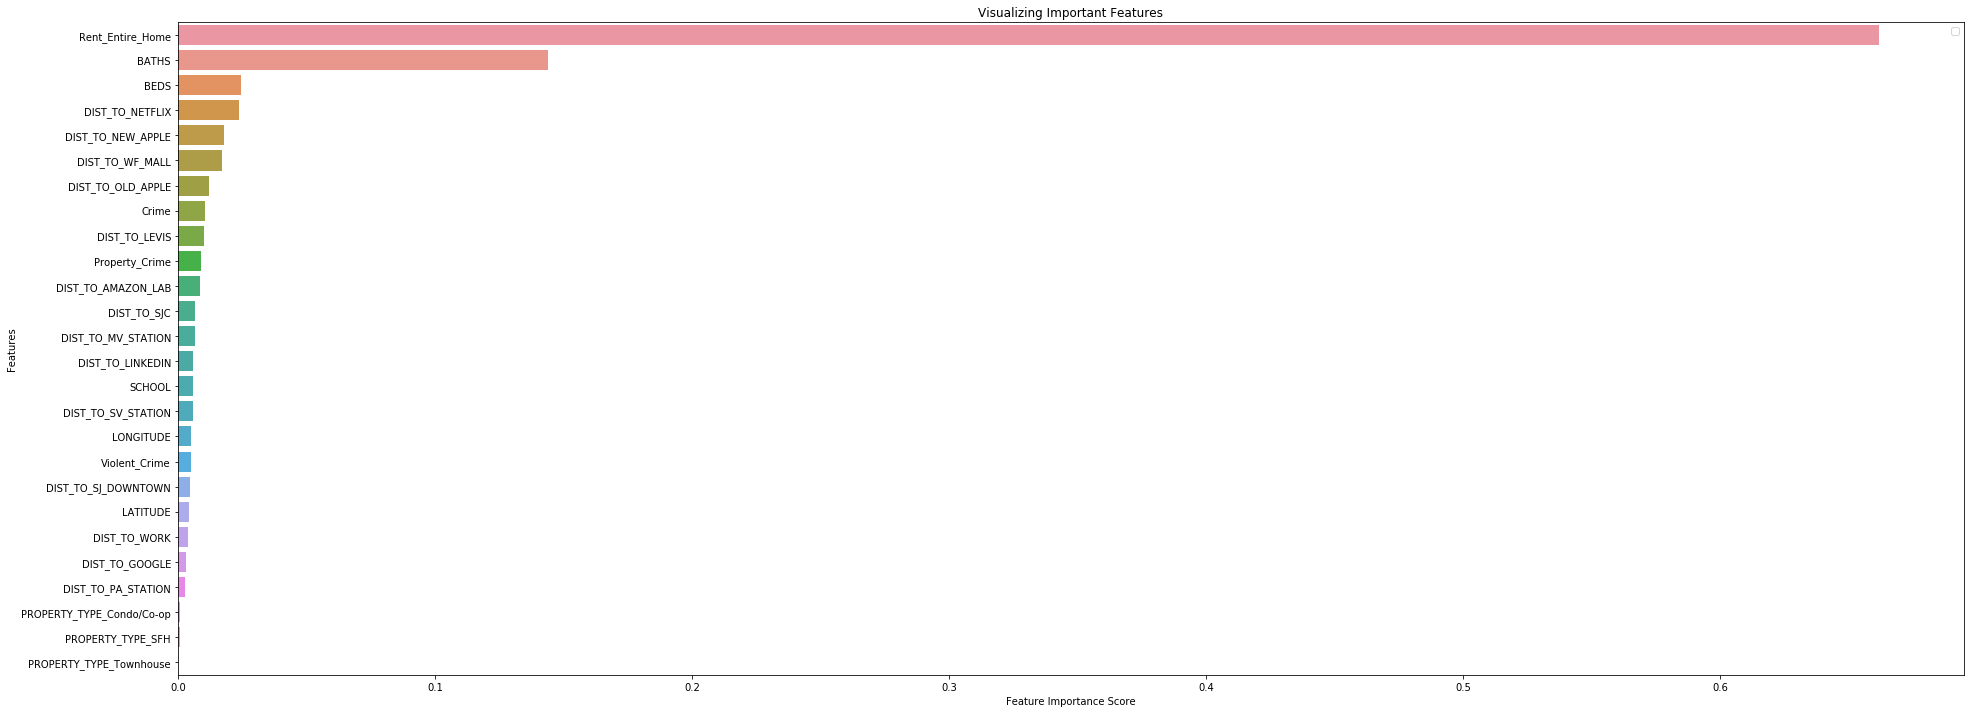

In [430]:
plt.figure(figsize=(32, 12))
sns.barplot(x=feature_imp_airbnb, y=feature_imp_airbnb.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Relationship between Original and Predicted Price')

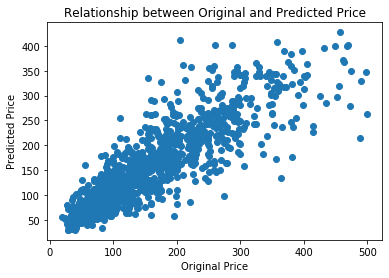

In [356]:
#Fitted vs. Original

#Homes with price > $5mm show big errors
plt.scatter(y_true_airbnb, y_pred_airbnb)
plt.xlabel("Original Price")
plt.ylabel("Predicted Price")
plt.title("Relationship between Original and Predicted Price")

Text(0.5, 1.0, 'Relationship between Residuals and Fitted Values')

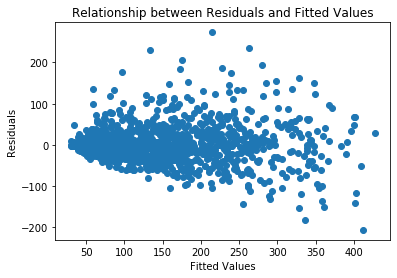

In [357]:
#Residuals vs. Fitted

residuals_airbnb = y_test_airbnb['price'].to_numpy() - y_pred_airbnb

plt.scatter(y_pred_airbnb, residuals_airbnb)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Relationship between Residuals and Fitted Values")

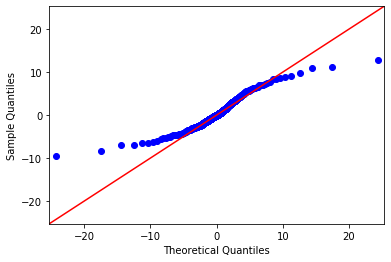

In [358]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.qqplot(residuals_airbnb, stats.t, fit=True, line='45')
plt.show()

In [359]:
redfin.shape

(23059, 112)

In [360]:
y_pred_redfin_all =rfr_redfin.predict(X_redfin)

redfin['pred_home_price'] = y_pred_redfin_all
redfin.head()

,PRICE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR,HOA/MONTH,LATITUDE,LONGITUDE,Q_1,Q_2,Q_3,Q_4,sale_num_zip,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,zipcode,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_MFH(2-4),PROPERTY_TYPE_SFH,PROPERTY_TYPE_Townhouse,CITY_ALVISO,CITY_CAMPBELL,CITY_CUPERTINO,CITY_GILROY,CITY_LOS ALTOS,CITY_LOS ALTOS HILLS,CITY_LOS GATOS,CITY_MILPITAS,CITY_MONTE SERENO,CITY_MORGAN HILL,CITY_MOUNTAIN VIEW,CITY_PALO ALTO,CITY_SAN JOSE,CITY_SAN MARTIN,CITY_SANTA CLARA,CITY_SARATOGA,CITY_STANFORD,CITY_SUNNYVALE,ZIPCODE_94022,ZIPCODE_94024,ZIPCODE_94040,ZIPCODE_94041,ZIPCODE_94043,ZIPCODE_94085,ZIPCODE_94086,ZIPCODE_94087,ZIPCODE_94089,ZIPCODE_94301,ZIPCODE_94303,ZIPCODE_94304,ZIPCODE_94305,ZIPCODE_94306,ZIPCODE_95002,ZIPCODE_95008,ZIPCODE_95014,ZIPCODE_95020,ZIPCODE_95030,ZIPCODE_95032,ZIPCODE_95033,ZIPCODE_95035,ZIPCODE_95037,ZIPCODE_95046,ZIPCODE_95050,ZIPCODE_95051,ZIPCODE_95054,ZIPCODE_95070,ZIPCODE_95110,ZIPCODE_95111,ZIPCODE_95112,ZIPCODE_95113,ZIPCODE_95116,ZIPCODE_95117,ZIPCODE_95118,ZIPCODE_95119,ZIPCODE_95120,ZIPCODE_95121,ZIPCODE_95122,ZIPCODE_95123,ZIPCODE_95124,ZIPCODE_95125,ZIPCODE_95126,ZIPCODE_95127,ZIPCODE_95128,ZIPCODE_95129,ZIPCODE_95130,ZIPCODE_95131,ZIPCODE_95132,ZIPCODE_95133,ZIPCODE_95134,ZIPCODE_95135,ZIPCODE_95136,ZIPCODE_95138,ZIPCODE_95139,ZIPCODE_95140,ZIPCODE_95148,pred_home_price
0,1050000.0,3.0,2.0,1097.0,6242.0,1961.0,117.0,37.389165,-121.947778,0,0,1,0,300,7.831138,6.021112,5.013714,12.520029,7.025839,4.615506,4.327803,9.134459,4.982873,4.813922,4.863905,1.398783,1.877193,51.005,18.6,30.0,24.3,8.141868,95054,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1028582.12
1,882000.0,1.0,1.0,865.0,865.0,2005.0,383.0,37.396173,-121.943140,0,1,0,0,300,7.952171,6.533607,5.545432,12.628724,7.270338,4.962220,4.807594,9.642046,5.245473,5.055797,4.998462,1.289921,2.196742,51.005,18.6,30.0,24.3,8.408700,95054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,846110.00
2,680000.0,1.0,1.0,900.0,900.0,2005.0,390.0,37.396330,-121.943234,0,0,0,1,300,7.944713,6.537169,5.550320,12.620936,7.265331,4.959864,4.818334,9.652188,5.257395,5.050900,4.991439,1.280373,2.208670,51.005,18.6,30.0,24.3,8.405558,95054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,818660.00
3,1182375.0,4.0,2.0,1466.0,7618.0,1961.0,117.0,37.387366,-121.950200,0,0,0,1,300,7.741506,5.839159,4.832416,12.431469,6.901026,4.465685,4.211869,8.999119,4.964681,4.692581,4.774428,1.421669,1.854110,51.005,18.6,30.0,24.3,8.018523,95054,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1193508.75
4,1570000.0,4.0,2.0,1666.0,6000.0,1969.0,117.0,37.392009,-121.940445,0,1,0,0,300,8.165457,6.455431,5.431785,12.849111,7.420835,5.046330,4.525220,9.375913,4.922941,5.205928,5.202981,1.565417,1.876366,51.005,18.6,30.0,24.3,8.507886,95054,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1494746.38


In [361]:
#Reduce the redfin features to the list of airbnb features and predict rental income
redfin_rental_features = ['BEDS','BATHS','LATITUDE','LONGITUDE',
                 'DIST_TO_GOOGLE','DIST_TO_OLD_APPLE','DIST_TO_NEW_APPLE',
                 'DIST_TO_PA_STATION','DIST_TO_MV_STATION','DIST_TO_SV_STATION','DIST_TO_WF_MALL',
                 'DIST_TO_NETFLIX','DIST_TO_SJ_DOWNTOWN','DIST_TO_LINKEDIN','DIST_TO_AMAZON_LAB',
                 'DIST_TO_LEVIS','DIST_TO_SJC','SCHOOL','Violent_Crime','Property_Crime',
                 'Crime','DIST_TO_WORK','PROPERTY_TYPE_Condo/Co-op','PROPERTY_TYPE_SFH',
                 'PROPERTY_TYPE_Townhouse']

X_redfin_reduced = redfin.loc[:,redfin_rental_features]

#Change this feature's value to see rental income if the entire home is rented or not
rent_entire_home = 1

X_redfin_reduced['Rent_Entire_Home']=rent_entire_home
X_redfin_reduced.head()

,BEDS,BATHS,LATITUDE,LONGITUDE,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_SFH,PROPERTY_TYPE_Townhouse,Rent_Entire_Home
0,3.0,2.0,37.389165,-121.947778,7.831138,6.021112,5.013714,12.520029,7.025839,4.615506,4.327803,9.134459,4.982873,4.813922,4.863905,1.398783,1.877193,51.005,18.6,30.0,24.3,8.141868,0,1,0,1
1,1.0,1.0,37.396173,-121.943140,7.952171,6.533607,5.545432,12.628724,7.270338,4.962220,4.807594,9.642046,5.245473,5.055797,4.998462,1.289921,2.196742,51.005,18.6,30.0,24.3,8.408700,1,0,0,1
2,1.0,1.0,37.396330,-121.943234,7.944713,6.537169,5.550320,12.620936,7.265331,4.959864,4.818334,9.652188,5.257395,5.050900,4.991439,1.280373,2.208670,51.005,18.6,30.0,24.3,8.405558,1,0,0,1
3,4.0,2.0,37.387366,-121.950200,7.741506,5.839159,4.832416,12.431469,6.901026,4.465685,4.211869,8.999119,4.964681,4.692581,4.774428,1.421669,1.854110,51.005,18.6,30.0,24.3,8.018523,0,1,0,1
4,4.0,2.0,37.392009,-121.940445,8.165457,6.455431,5.431785,12.849111,7.420835,5.046330,4.525220,9.375913,4.922941,5.205928,5.202981,1.565417,1.876366,51.005,18.6,30.0,24.3,8.507886,0,1,0,1


In [362]:
y_redfin_pred_rental =rfr_airbnb.predict(X_redfin_reduced)
redfin['pred_rental_price'] = y_redfin_pred_rental
redfin.head()

,PRICE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR,HOA/MONTH,LATITUDE,LONGITUDE,Q_1,Q_2,Q_3,Q_4,sale_num_zip,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,zipcode,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_MFH(2-4),PROPERTY_TYPE_SFH,PROPERTY_TYPE_Townhouse,CITY_ALVISO,CITY_CAMPBELL,CITY_CUPERTINO,CITY_GILROY,CITY_LOS ALTOS,CITY_LOS ALTOS HILLS,CITY_LOS GATOS,CITY_MILPITAS,CITY_MONTE SERENO,CITY_MORGAN HILL,CITY_MOUNTAIN VIEW,CITY_PALO ALTO,CITY_SAN JOSE,CITY_SAN MARTIN,CITY_SANTA CLARA,CITY_SARATOGA,CITY_STANFORD,CITY_SUNNYVALE,ZIPCODE_94022,ZIPCODE_94024,ZIPCODE_94040,ZIPCODE_94041,ZIPCODE_94043,ZIPCODE_94085,ZIPCODE_94086,ZIPCODE_94087,ZIPCODE_94089,ZIPCODE_94301,ZIPCODE_94303,ZIPCODE_94304,ZIPCODE_94305,ZIPCODE_94306,ZIPCODE_95002,ZIPCODE_95008,ZIPCODE_95014,ZIPCODE_95020,ZIPCODE_95030,ZIPCODE_95032,ZIPCODE_95033,ZIPCODE_95035,ZIPCODE_95037,ZIPCODE_95046,ZIPCODE_95050,ZIPCODE_95051,ZIPCODE_95054,ZIPCODE_95070,ZIPCODE_95110,ZIPCODE_95111,ZIPCODE_95112,ZIPCODE_95113,ZIPCODE_95116,ZIPCODE_95117,ZIPCODE_95118,ZIPCODE_95119,ZIPCODE_95120,ZIPCODE_95121,ZIPCODE_95122,ZIPCODE_95123,ZIPCODE_95124,ZIPCODE_95125,ZIPCODE_95126,ZIPCODE_95127,ZIPCODE_95128,ZIPCODE_95129,ZIPCODE_95130,ZIPCODE_95131,ZIPCODE_95132,ZIPCODE_95133,ZIPCODE_95134,ZIPCODE_95135,ZIPCODE_95136,ZIPCODE_95138,ZIPCODE_95139,ZIPCODE_95140,ZIPCODE_95148,pred_home_price,pred_rental_price
0,1050000.0,3.0,2.0,1097.0,6242.0,1961.0,117.0,37.389165,-121.947778,0,0,1,0,300,7.831138,6.021112,5.013714,12.520029,7.025839,4.615506,4.327803,9.134459,4.982873,4.813922,4.863905,1.398783,1.877193,51.005,18.6,30.0,24.3,8.141868,95054,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1028582.12,295.110931
1,882000.0,1.0,1.0,865.0,865.0,2005.0,383.0,37.396173,-121.943140,0,1,0,0,300,7.952171,6.533607,5.545432,12.628724,7.270338,4.962220,4.807594,9.642046,5.245473,5.055797,4.998462,1.289921,2.196742,51.005,18.6,30.0,24.3,8.408700,95054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,846110.00,146.695431
2,680000.0,1.0,1.0,900.0,900.0,2005.0,390.0,37.396330,-121.943234,0,0,0,1,300,7.944713,6.537169,5.550320,12.620936,7.265331,4.959864,4.818334,9.652188,5.257395,5.050900,4.991439,1.280373,2.208670,51.005,18.6,30.0,24.3,8.405558,95054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,818660.00,144.037585
3,1182375.0,4.0,2.0,1466.0,7618.0,1961.0,117.0,37.387366,-121.950200,0,0,0,1,300,7.741506,5.839159,4.832416,12.431469,6.901026,4.465685,4.211869,8.999119,4.964681,4.692581,4.774428,1.421669,1.854110,51.005,18.6,30.0,24.3,8.018523,95054,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1193508.75,347.138509
4,1570000.0,4.0,2.0,1666.0,6000.0,1969.0,117.0,37.392009,-121.940445,0,1,0,0,300,8.165457,6.455431,5.431785,12.849111,7.420835,5.046330,4.525220,9.375913,4.922941,5.205928,5.202981,1.565417,1.876366,51.005,18.6,30.0,24.3,8.507886,95054,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1494746.38,335.761327


In [367]:
#Check out: roofstock.com
#https://learn.roofstock.com/blog/calculate-roi-on-rental-property
    
#Investment for Cash Flows

#Assumes no vacancy with the predicted daily airbnb price

#This is an aggressive assumption, limit the airbnb data to no vacancy observations?
#Also, there's monthly price in the airbnb data (very few observations tho)
#Or, use the actual monthly rental estimate from Zillow

#The actual ROI should subtract any costs during the year including 
#taxes, maintainance, hoa, utilities, insurance, property management fees
#Closing costs, repairs and remodelling costs should be subtracted from the initial investment

#This is assuming the house is bought in cash with no mortgages, if not subtract the monthly mortgages
#Some people add the equity each year into income but keep in mind that it's not realized unless you sell it or HELOC it

#This is assuming no appreciation of the home, if not add it to the equity but again won't realize it untill you sell it

#Capitalization rate(cap rate) doesn't consider mortgages and use total home price instead of initial cash
#Cap rate = NOI x 12 months / purchase price
#NOI = (rental income + other income) - vacancy losses and operating expenses
redfin['Cap_Rate']=redfin['pred_rental_price'] * 365 / redfin['pred_home_price']

redfin = redfin.sort_values('Cap_Rate',ascending=False )
redfin.head()

,PRICE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR,HOA/MONTH,LATITUDE,LONGITUDE,Q_1,Q_2,Q_3,Q_4,sale_num_zip,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,SCHOOL,Violent_Crime,Property_Crime,Crime,DIST_TO_WORK,zipcode,PROPERTY_TYPE_Condo/Co-op,PROPERTY_TYPE_MFH(2-4),PROPERTY_TYPE_SFH,PROPERTY_TYPE_Townhouse,CITY_ALVISO,CITY_CAMPBELL,CITY_CUPERTINO,CITY_GILROY,CITY_LOS ALTOS,CITY_LOS ALTOS HILLS,CITY_LOS GATOS,CITY_MILPITAS,CITY_MONTE SERENO,CITY_MORGAN HILL,CITY_MOUNTAIN VIEW,CITY_PALO ALTO,CITY_SAN JOSE,CITY_SAN MARTIN,CITY_SANTA CLARA,CITY_SARATOGA,CITY_STANFORD,CITY_SUNNYVALE,ZIPCODE_94022,ZIPCODE_94024,ZIPCODE_94040,ZIPCODE_94041,ZIPCODE_94043,ZIPCODE_94085,ZIPCODE_94086,ZIPCODE_94087,ZIPCODE_94089,ZIPCODE_94301,ZIPCODE_94303,ZIPCODE_94304,ZIPCODE_94305,ZIPCODE_94306,ZIPCODE_95002,ZIPCODE_95008,ZIPCODE_95014,ZIPCODE_95020,ZIPCODE_95030,ZIPCODE_95032,ZIPCODE_95033,ZIPCODE_95035,ZIPCODE_95037,ZIPCODE_95046,ZIPCODE_95050,ZIPCODE_95051,ZIPCODE_95054,ZIPCODE_95070,ZIPCODE_95110,ZIPCODE_95111,ZIPCODE_95112,ZIPCODE_95113,ZIPCODE_95116,ZIPCODE_95117,ZIPCODE_95118,ZIPCODE_95119,ZIPCODE_95120,ZIPCODE_95121,ZIPCODE_95122,ZIPCODE_95123,ZIPCODE_95124,ZIPCODE_95125,ZIPCODE_95126,ZIPCODE_95127,ZIPCODE_95128,ZIPCODE_95129,ZIPCODE_95130,ZIPCODE_95131,ZIPCODE_95132,ZIPCODE_95133,ZIPCODE_95134,ZIPCODE_95135,ZIPCODE_95136,ZIPCODE_95138,ZIPCODE_95139,ZIPCODE_95140,ZIPCODE_95148,pred_home_price,pred_rental_price,Cap_Rate
5053,635000.0,5.0,3.0,1858.0,6120.0,1975.0,117.0,37.024059,-121.570157,0,0,0,1,1148,39.456910,33.097565,32.327787,43.738714,37.815190,35.260358,29.349478,27.025117,27.705340,36.195795,36.826458,34.075723,30.813848,45.789375,31.7,40.7,36.20,38.148927,95020,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,650669.74,337.424857,0.189282
23423,301000.0,1.0,1.0,456.0,1875.0,1983.0,308.0,37.355894,-121.850098,0,0,0,1,374,13.657439,10.061080,8.843174,18.346963,12.680131,10.059979,5.575220,9.234136,2.988820,10.519866,10.692611,7.115334,4.416115,33.410882,47.2,56.1,51.65,13.270697,95116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,322965.52,165.561445,0.187110
5058,652000.0,5.0,3.0,1948.0,5120.0,1987.0,165.0,37.022170,-121.606358,0,0,0,1,1148,38.143059,31.678920,30.952358,42.352582,36.461127,33.944635,28.077268,25.529664,26.563822,34.905878,35.571280,32.943730,29.673720,45.789375,31.7,40.7,36.20,36.798314,95020,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,682915.00,350.009062,0.187071
18045,545000.0,4.0,2.5,1247.0,1482.0,1989.0,112.0,37.362609,-121.832753,0,0,0,1,739,14.420801,11.082827,9.864969,19.108666,13.530262,10.946892,6.633573,10.228855,4.039347,11.346510,11.453847,7.783424,5.318008,31.567143,26.8,38.1,32.45,14.119115,95127,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,611608.50,310.257827,0.185158
13101,560000.0,4.0,2.5,1474.0,1012.0,1972.0,347.0,37.312265,-121.824701,0,0,0,1,356,16.160222,11.406297,10.247547,20.801359,14.923431,12.228237,6.665433,8.537357,4.045254,12.893416,13.253802,9.974371,6.858106,52.375500,22.8,32.9,27.85,15.376756,95121,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,612970.00,309.606918,0.184359


C:\Users\armcl\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


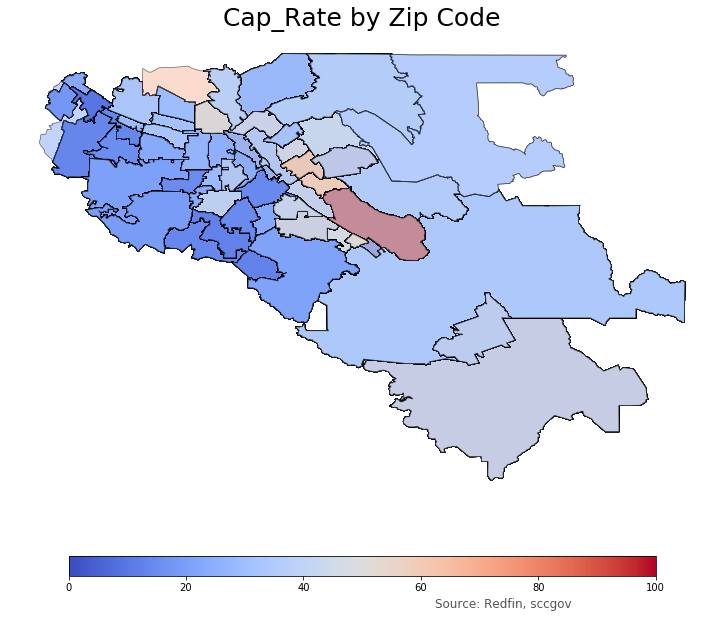

In [366]:
#Let's make a map!
import geopandas as gpd

#Santa Clara County shape file by zip code
map_df = gpd.read_file(data_path + "ba_map/zipcode_scc/Zip_Codes.shp")
#SF Bay Area shape file by zip code
#map_df = gpd.read_file(data_path + "ba_map/zipcode_scc/Zip_Codes.shp")

#map_df.plot()


# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
#map_df
#plt.rcParams['figure.figsize'] = [50, 70] #height, width
#map_df.plot()

redfin['zipcode'] = redfin['zipcode'].astype(str)
#redfin['ZIP OR POSTAL CODE'] = redfin['ZIP OR POSTAL CODE'].astype(str)

#Extremely high 
map_df = map_df.drop(columns=['LATITUDE','LONGITUDE'])

merged = map_df.set_index('ZCTA').join(redfin.set_index('zipcode'))
#merged = merged[['POPULATION','FAMILIES','MALE','FEMALE','WHITE','BLACK','ASIAN_PACI',
#                'CHINESE','HISPANIC_O','geometry','PROPERTY TYPE','CITY','PRICE','BEDS',
#                'BATHS','SQUARE FEET','LOT SIZE','YEAR BUILT','HOA/MONTH','TOTAL SIZE',
#               'sale_num_zip','Percentage Standard Met and Above','Violent_Crime',
#               'Property_Crime','Crime','DIST_TO_WORK']]
#merged
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# set the value column that will be visualised
variable = 'Cap_Rate'

# set the range for the choropleth values
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title(variable + ' by Zip Code', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Redfin, sccgov', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

# create map
merged.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax,
           alpha=0.5, edgecolor='k')


# import contextily as ctx
# merged = merged.to_crs(epsg=3857)
# #fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# #contextily.add_basemap(ax)
# #plt.show()

# # Dataframe you want to plot
# gdf = gpd.GeoDataFrame(merged, crs= {"init": "epsg:4326"}) # Create a georeferenced dataframe  
# gdf = gdf.to_crs(epsg=3857) # reproject it in Web mercator
# ax = gdf.plot()

# # choose any of the supported maps from ctx.sources
# ctx.add_basemap(ax, url=ctx.sources.ST_TERRAIN)
# ax.set_axis_off()
# plt.show()